In [1]:
import pandas as pd
from functools import reduce
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import langid
from concurrent.futures import ProcessPoolExecutor
import ast
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

**MENGGABUNGKAN TEMA KE SATU BARIS**

In [3]:
theme = pd.read_csv('themes.csv')

In [4]:
theme

,id,theme
0,1000001,Humanity and the world around us
1,1000001,Crude humor and satire
2,1000001,Moving relationship stories
3,1000001,Emotional and captivating fantasy storytelling
4,1000001,Surreal and thought-provoking visions of life ...
...,...,...
125636,1835643,Noir and dark crime dramas
125637,1835643,Intriguing and suspenseful murder mysteries
125638,1849827,Faith and religion
125639,1849827,Faith and spiritual journeys


In [5]:
# Gabungkan tema berdasarkan 'id', pastikan setiap nilai dikonversi ke string terlebih dahulu
theme_grouped = theme.groupby('id')['theme'].apply(lambda x: ', '.join(x.dropna().astype(str))).reset_index()

# Ubah nama kolom hasil gabungan menjadi 'themes'
theme_grouped.rename(columns={'theme': 'themes'}, inplace=True)

In [6]:
theme_grouped

,id,themes
0,1000001,"Humanity and the world around us, Crude humor ..."
1,1000002,"Humanity and the world around us, Intense viol..."
2,1000003,"Humanity and the world around us, Moving relat..."
3,1000004,"Intense violence and sexual transgression, Hum..."
4,1000005,"Song and dance, Humanity and the world around ..."
...,...,...
24503,1762425,"Song and dance, Erotic relationships and desire"
24504,1819348,"Intense violence and sexual transgression, Twi..."
24505,1826155,"Horror, the undead and monster classics, Survi..."
24506,1835643,"Crime, drugs and gangsters, Suspenseful crime ..."


In [7]:
theme_grouped.to_csv('themes.combined.csv', index=False)

**MENGGABUNGKAN GENRE KE SATU BARIS**

In [10]:
genre = pd.read_csv('genres.csv')

In [11]:
genre

,id,genre
0,1000001,Comedy
1,1000001,Adventure
2,1000002,Comedy
3,1000002,Thriller
4,1000002,Drama
...,...,...
1046844,1941563,Drama
1046845,1941566,Crime
1046846,1941569,Crime
1046847,1941596,Action


In [12]:
genre.isnull().sum()

id       0
genre    0
dtype: int64

In [13]:
# Gabungkan genre berdasarkan 'id'
genre_grouped = genre.groupby("id")["genre"].apply(", ".join).reset_index()

In [14]:
genre_grouped

,id,genre
0,1000001,"Comedy, Adventure"
1,1000002,"Comedy, Thriller, Drama"
2,1000003,"Science Fiction, Adventure, Comedy, Action"
3,1000004,Drama
4,1000005,"Drama, Comedy, Music, Romance"
...,...,...
676486,1941559,Comedy
676487,1941563,Drama
676488,1941566,Crime
676489,1941569,Crime


In [15]:
genre_grouped.to_csv('genres.combined.csv', index=False)

**MENGGABUNGKAN SEMUA ATRIBUT KE SATU DATASET**

In [2]:
title = pd.read_csv('movies.csv')
theme_grouped = pd.read_csv('themes.combined.csv')
genre_grouped = pd.read_csv('genres.combined.csv')

In [21]:
title

,id,name,date,tagline,description,minute,rating
0,1000001,Barbie,2023.0,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114.0,3.86
1,1000002,Parasite,2019.0,Act like you own the place.,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56
2,1000003,Everything Everywhere All at Once,2022.0,The universe is so much bigger than you realize.,An aging Chinese immigrant is swept up in an i...,140.0,4.30
3,1000004,Fight Club,1999.0,Mischief. Mayhem. Soap.,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27
4,1000005,La La Land,2016.0,Here's to the fools who dream.,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09
...,...,...,...,...,...,...,...
941592,1941593,神笛,NaN,NaN,NaN,NaN,NaN
941593,1941594,蟲極道蜜団子抗争編 壱ノ巻,NaN,NaN,Shinjuku forest at night. In the sap taverns o...,30.0,NaN
941594,1941595,蟲極道蜜団子抗争編 弐ノ巻,NaN,NaN,"The city that never sleeps, where insects gath...",30.0,NaN
941595,1941596,重生,NaN,NaN,"In a world where order has broken down, darkne...",NaN,NaN


In [18]:
# Mengecek nilai kosong
print("Nilai kosong di setiap kolom:\n", title.isnull().sum())

Nilai kosong di setiap kolom:
 id                  0
name                7
date            91913
tagline        802209
description    160811
minute         181570
rating         850598
dtype: int64

Baris dengan nilai kosong:
              id                 name    date tagline  \
34      1000035           Black Swan  2010.0     NaN   
68      1000069           Past Lives  2023.0     NaN   
133     1000134            Toy Story  1995.0     NaN   
146     1000147  Requiem for a Dream  2000.0     NaN   
162     1000163        Asteroid City  2023.0     NaN   
...         ...                  ...     ...     ...   
941592  1941593                   神笛     NaN     NaN   
941593  1941594        蟲極道蜜団子抗争編 壱ノ巻     NaN     NaN   
941594  1941595        蟲極道蜜団子抗争編 弐ノ巻     NaN     NaN   
941595  1941596                   重生     NaN     NaN   
941596  1941597               青ひげ公の城     NaN     NaN   

                                              description  minute  rating  
34      A journey throug

<Figure size 1200x700 with 0 Axes>

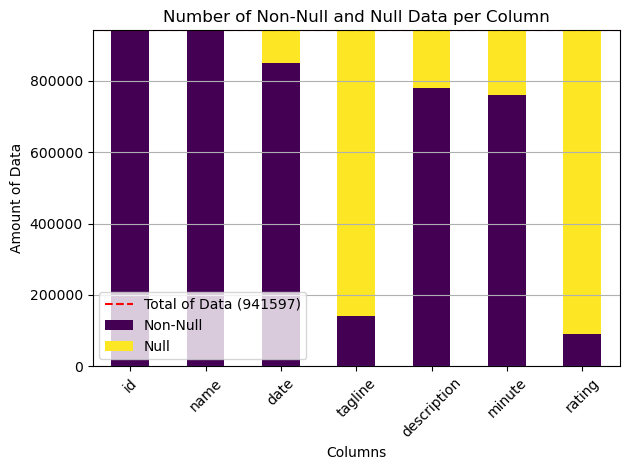

In [6]:
# Load dataset
df_movies = title

# Hitung jumlah data total dan non-null
total_data = len(df_movies)
non_null_df = pd.DataFrame({
    "Columns": df_movies.columns,
    "Non-Null": df_movies.notnull().sum(),
    "Null": df_movies.isnull().sum()
})
non_null_df["Total"] = total_data

# Buat visualisasi stacked bar chart
plt.figure(figsize=(12, 7))
non_null_df.set_index("Columns")[["Non-Null", "Null"]].plot(kind='bar', stacked=True, colormap="viridis")
plt.axhline(total_data, color='red', linestyle='--', linewidth=1.5, label=f"Total of Data ({total_data})")
plt.title("Number of Non-Null and Null Data per Column")
plt.ylabel("Amount of Data")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [16]:
# Menghapus field yang tidak relevan
title.drop(columns=["date","minute","rating","tagline"], inplace=True)

In [5]:
# Menghapus data kosong
title.dropna(subset=["name", "description"], inplace=True)

In [6]:
title

,id,name,description
0,1000001,Barbie,Barbie and Ken are having the time of their li...
1,1000002,Parasite,"All unemployed, Ki-taek's family takes peculia..."
2,1000003,Everything Everywhere All at Once,An aging Chinese immigrant is swept up in an i...
3,1000004,Fight Club,A ticking-time-bomb insomniac and a slippery s...
4,1000005,La La Land,"Mia, an aspiring actress, serves lattes to mov..."
...,...,...,...
941585,1941586,日本統一59,"One day, while Himuro (Yasufu Motomiya), Tamur..."
941586,1941587,日本統一60,Himuro (Yasufu Motomiya) starts a fight to cru...
941593,1941594,蟲極道蜜団子抗争編 壱ノ巻,Shinjuku forest at night. In the sap taverns o...
941594,1941595,蟲極道蜜団子抗争編 弐ノ巻,"The city that never sleeps, where insects gath..."


In [17]:
# Menggabungkan field data genres dan themes
data = [title, theme_grouped, genre_grouped]
dataset = reduce(lambda left, right: pd.merge(left, right, on='id', how='inner'), data)

In [18]:
dataset

,id,name,description,themes,genre
0,1000001,Barbie,Barbie and Ken are having the time of their li...,"Humanity and the world around us, Crude humor ...","Comedy, Adventure"
1,1000002,Parasite,"All unemployed, Ki-taek's family takes peculia...","Humanity and the world around us, Intense viol...","Comedy, Thriller, Drama"
2,1000003,Everything Everywhere All at Once,An aging Chinese immigrant is swept up in an i...,"Humanity and the world around us, Moving relat...","Science Fiction, Adventure, Comedy, Action"
3,1000004,Fight Club,A ticking-time-bomb insomniac and a slippery s...,"Intense violence and sexual transgression, Hum...",Drama
4,1000005,La La Land,"Mia, an aspiring actress, serves lattes to mov...","Song and dance, Humanity and the world around ...","Drama, Comedy, Music, Romance"
...,...,...,...,...,...
24414,1664306,Fixerr,ATS Officer Jayveer Malik’s stands suspended a...,"Thrillers and murder mysteries, High speed and...",Drama
24415,1693420,"LSD - Love, Scandal and Doctors","Love, Scandal and Doctors is a story of 5 medi...","Thrillers and murder mysteries, High speed and...","Drama, Mystery"
24416,1702871,Olessia,Film with a soundtrack featuring G. Venugopal ...,"Song and dance, Dazzling vocal performances an...",Drama
24417,1762425,Pretty Things,A look into the world of 20th century burlesqu...,"Song and dance, Erotic relationships and desire",Documentary


**PEMBERSIHAN DATASET**

In [ ]:
def is_english(text):
    try:
        return langid.classify(text)[0] == 'en'  # Jika bahasa yang terdeteksi adalah English ('en'), kembalikan True
    except Exception as e:
        print(f"Error while processing text: {e}")
        return False  # Jika gagal mendeteksi bahasa, anggap bukan bahasa Inggris

# Fungsi untuk memfilter dataframe secara paralel menggunakan ProcessPoolExecutor
def filter_rows_parallel(dataset, column_name):
    from concurrent.futures import ThreadPoolExecutor

    with ThreadPoolExecutor() as executor:
        # Menggunakan executor untuk menjalankan is_english secara paralel pada setiap teks di kolom
        result = list(executor.map(is_english, dataset[column_name]))
    return dataset[result]

In [26]:
# Menghapus data yang bukan bahasa Inggris berdasarkan kolom 'description' dan 'name' secara paralel
dataset = filter_rows_parallel(dataset, 'description')
dataset = filter_rows_parallel(dataset, 'themes')

In [27]:
dataset

,id,name,description,themes,genre
0,1000001,Barbie,Barbie and Ken are having the time of their li...,"Humanity and the world around us, Crude humor ...","Comedy, Adventure"
1,1000002,Parasite,"All unemployed, Ki-taek's family takes peculia...","Humanity and the world around us, Intense viol...","Comedy, Thriller, Drama"
2,1000003,Everything Everywhere All at Once,An aging Chinese immigrant is swept up in an i...,"Humanity and the world around us, Moving relat...","Science Fiction, Adventure, Comedy, Action"
3,1000004,Fight Club,A ticking-time-bomb insomniac and a slippery s...,"Intense violence and sexual transgression, Hum...",Drama
4,1000005,La La Land,"Mia, an aspiring actress, serves lattes to mov...","Song and dance, Humanity and the world around ...","Drama, Comedy, Music, Romance"
...,...,...,...,...,...
24407,1664306,Fixerr,ATS Officer Jayveer Malik’s stands suspended a...,"Thrillers and murder mysteries, High speed and...",Drama
24408,1693420,"LSD - Love, Scandal and Doctors","Love, Scandal and Doctors is a story of 5 medi...","Thrillers and murder mysteries, High speed and...","Drama, Mystery"
24409,1702871,Olessia,Film with a soundtrack featuring G. Venugopal ...,"Song and dance, Dazzling vocal performances an...",Drama
24410,1762425,Pretty Things,A look into the world of 20th century burlesqu...,"Song and dance, Erotic relationships and desire",Documentary


In [28]:
# Inisialisasi lemmatizer dan stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Fungsi untuk membersihkan teks
def clean_text(text):
    if not isinstance(text, str):  # Pastikan nilai berupa string
        return ""
    # Ubah menjadi huruf kecil
    text = text.lower()
    # Hapus karakter aneh (tapi tetap pertahankan angka & titik penting)
    text = re.sub(r'[^a-zA-Z0-9\s\.\,\!\?]', '', text)
    # Tokenisasi
    tokens = word_tokenize(text)
    # Stemming dan Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Gabungkan kembali menjadi teks bersih
    return ' '.join(tokens)

# Fungsi untuk memproses genre agar tetap berbentuk list
def process_genre(genre):
    if not isinstance(genre, str):
        return []
    return [g.strip() for g in genre.split(',')]

In [29]:
# Menghapus data duplikat dan data kosong berdasarkan semua kolom
dataset.drop_duplicates(inplace=True)
dataset.dropna(inplace=True)

# Membersihkan teks pada kolom 'name' dan 'description'
dataset['name'] = dataset['name'].apply(clean_text)
dataset['description'] = dataset['description'].apply(clean_text)
dataset['themes'] = dataset['themes'].apply(clean_text)

# Memproses genre agar tetap berbentuk list
dataset['genre'] = dataset['genre'].apply(process_genre)

In [30]:
dataset

,id,name,description,themes,genre
0,1000001,barbie,barbie and ken are having the time of their li...,"humanity and the world around u , crude humor ...","[Comedy, Adventure]"
1,1000002,parasite,"all unemployed , kitaeks family take peculiar ...","humanity and the world around u , intense viol...","[Comedy, Thriller, Drama]"
2,1000003,everything everywhere all at once,an aging chinese immigrant is swept up in an i...,"humanity and the world around u , moving relat...","[Science Fiction, Adventure, Comedy, Action]"
3,1000004,fight club,a tickingtimebomb insomniac and a slippery soa...,"intense violence and sexual transgression , hu...",[Drama]
4,1000005,la la land,"mia , an aspiring actress , serf latte to movi...","song and dance , humanity and the world around...","[Drama, Comedy, Music, Romance]"
...,...,...,...,...,...
24407,1664306,fixerr,at officer jayveer malik stand suspended after...,"thriller and murder mystery , high speed and s...",[Drama]
24408,1693420,"lsd love , scandal and doctor","love , scandal and doctor is a story of 5 medi...","thriller and murder mystery , high speed and s...","[Drama, Mystery]"
24409,1702871,olessia,film with a soundtrack featuring g. venugopal ...,"song and dance , dazzling vocal performance an...",[Drama]
24410,1762425,pretty thing,a look into the world of 20th century burlesqu...,"song and dance , erotic relationship and desire",[Documentary]


In [34]:
dataset.to_csv('dataset_bersih.csv', index=False)

In [26]:
dataset = pd.read_csv('dataset_bersih.csv')

In [ ]:
dataset

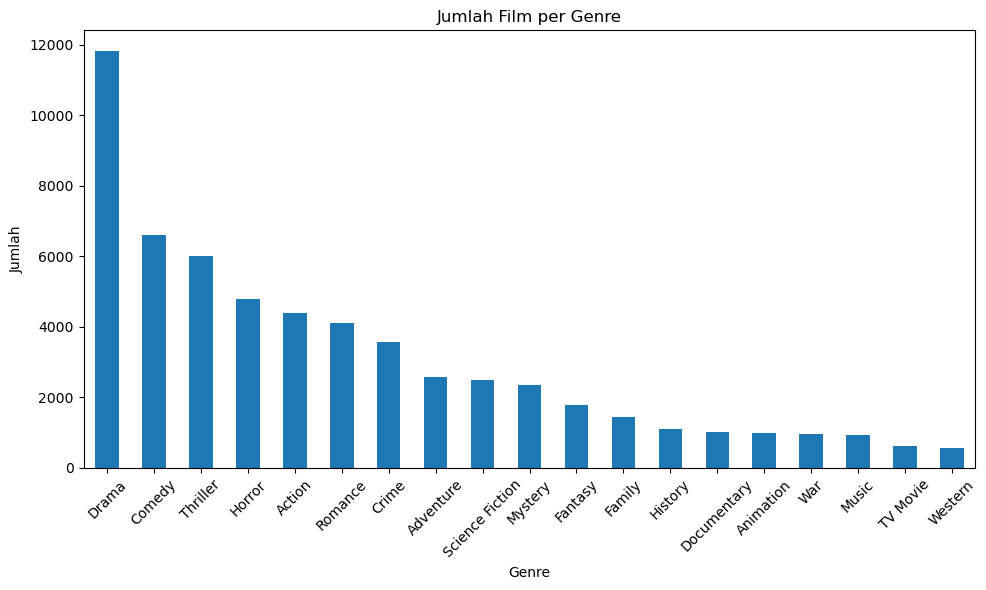

In [35]:
# Membuat DataFrame
df = pd.DataFrame(dataset)

# Ubah string list menjadi list asli
df['genres'] = df['genre'].apply(literal_eval)

# Hitung jumlah masing-masing genre
genre_counts = pd.Series([genre for sublist in df['genres'] for genre in sublist]).value_counts()

# Visualisasi
plt.figure(figsize=(10,6))
genre_counts.plot(kind='bar')
plt.title('Jumlah Film per Genre')
plt.xlabel('Genre')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**MENGHAPUS GENRE YANG TIDAK RELEVAN**

In [8]:
# Load data
df = pd.read_csv('dataset_bersih.csv')

# Daftar genre yang ingin dihapus
excluded_genres = ['Animation', 'Music', 'Family', 'TV Movie', 'War', 'Western']

# Ubah genre string ke list Python
df['genre'] = df['genre'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# Hapus baris dengan genre tunggal yang termasuk excluded_genres
df = df[~df['genre'].apply(lambda x: len(x) == 1 and x[0] in excluded_genres)]

# Hapus genre yang termasuk excluded_genres dari list
df['genre'] = df['genre'].apply(lambda x: [g for g in x if g not in excluded_genres])

# Hitung jumlah masing-masing genre
all_genres = [genre for sublist in df['genre'] for genre in sublist]
genre_counts = Counter(all_genres)

# Konversi ke DataFrame dan urutkan
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Hitung total genre keseluruhan
total_genre = sum(genre_counts.values())

# Tampilkan hasil
print(genre_df)
print(f"\nTotal keseluruhan genre (setelah pembersihan): {total_genre}")

              Genre  Count
3             Drama  11811
0            Comedy   6607
2          Thriller   6005
10           Horror   4790
5            Action   4386
6           Romance   4113
8             Crime   3566
1         Adventure   2579
4   Science Fiction   2505
9           Mystery   2337
11          Fantasy   1791
7           History   1109
12      Documentary   1024

Total keseluruhan genre (setelah pembersihan): 52623


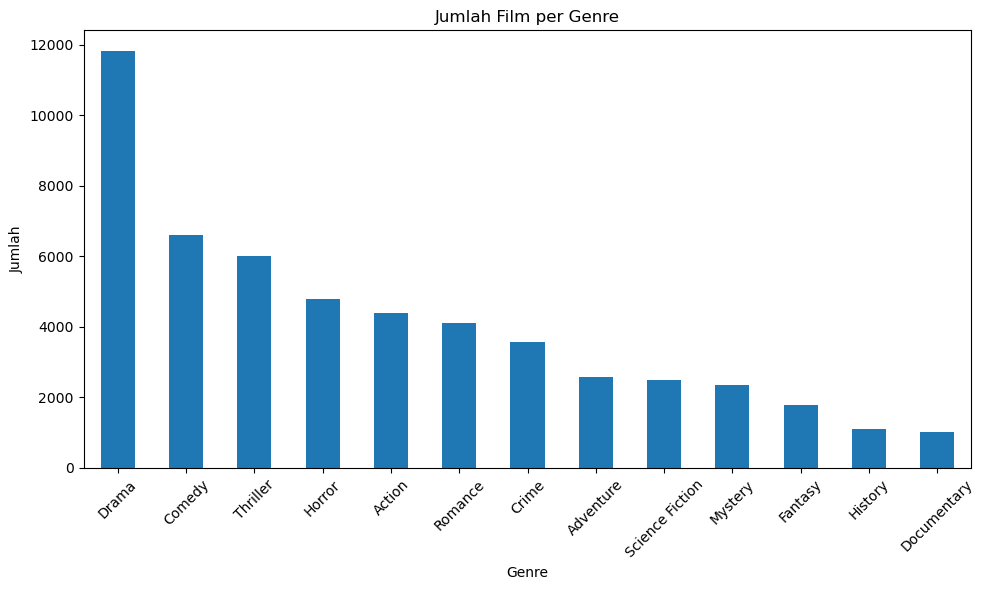

In [10]:
df = pd.DataFrame(df)

# Hitung jumlah masing-masing genre
genre_counts = pd.Series([genre for sublist in df['genre'] for genre in sublist]).value_counts()

# Visualisasi
plt.figure(figsize=(10,6))
genre_counts.plot(kind='bar')
plt.title('Jumlah Film per Genre')
plt.xlabel('Genre')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**SATU GENRE UNTUK SATU BARIS**

In [12]:
dataset = df

# Untuk tiap baris, ambil hanya genre terbawah (elemen terakhir) dan simpan sebagai string
dataset['genre'] = dataset['genre'].apply(lambda genres: genres[-1] if len(genres) > 0 else None)

# Hitung jumlah masing-masing genre
genre_counts = dataset['genre'].value_counts()  # menghasilkan Series dengan index sebagai Genre

# Ubah hasil hitung ke DataFrame dan urutkan (desc)
genre_df = genre_counts.reset_index()
genre_df.columns = ['Genre', 'Count']

# Hitung total keseluruhan genre (total baris yang memiliki genre)
total_genre = genre_df['Count'].sum()

# Tampilkan hasil
print(genre_df)
print(f"\nTotal keseluruhan genre: {total_genre}")

TypeError: object of type 'NoneType' has no len()

In [43]:
dataset

,id,name,description,themes,genre
0,1000001,barbie,barbie and ken are having the time of their li...,"humanity and the world around u , crude humor ...",Adventure
1,1000002,parasite,"all unemployed , kitaeks family take peculiar ...","humanity and the world around u , intense viol...",Drama
2,1000003,everything everywhere all at once,an aging chinese immigrant is swept up in an i...,"humanity and the world around u , moving relat...",Action
3,1000004,fight club,a tickingtimebomb insomniac and a slippery soa...,"intense violence and sexual transgression , hu...",Drama
4,1000005,la la land,"mia , an aspiring actress , serf latte to movi...","song and dance , humanity and the world around...",Romance
...,...,...,...,...,...
24393,1664306,fixerr,at officer jayveer malik stand suspended after...,"thriller and murder mystery , high speed and s...",Drama
24394,1693420,"lsd love , scandal and doctor","love , scandal and doctor is a story of 5 medi...","thriller and murder mystery , high speed and s...",Mystery
24395,1702871,olessia,film with a soundtrack featuring g. venugopal ...,"song and dance , dazzling vocal performance an...",Drama
24396,1762425,pretty thing,a look into the world of 20th century burlesqu...,"song and dance , erotic relationship and desire",Documentary


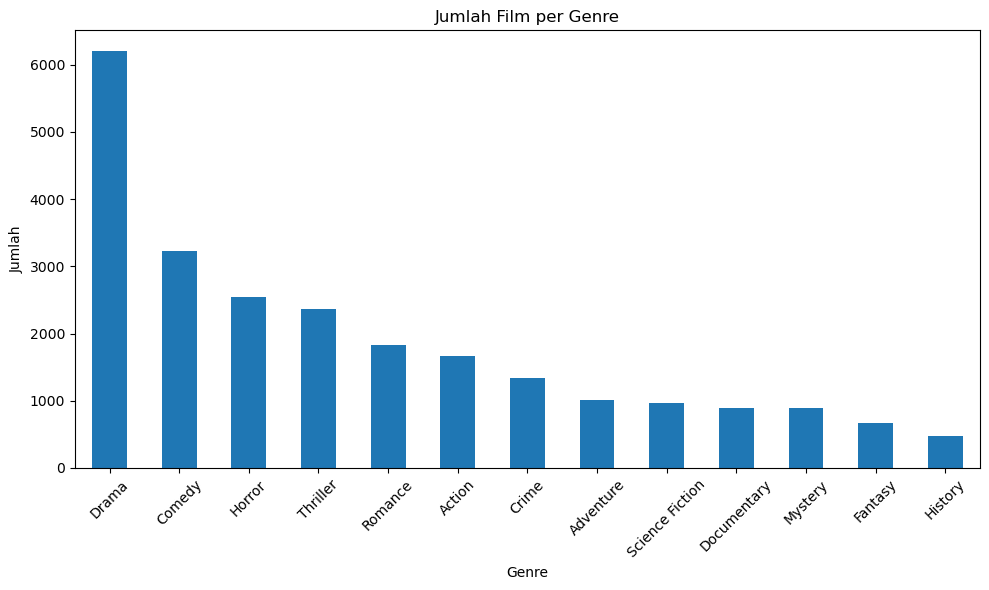

In [13]:
df = pd.DataFrame(dataset)

# Hitung jumlah masing-masing genre
genre_counts = df['genre'].value_counts()

# Visualisasi
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Jumlah Film per Genre')
plt.xlabel('Genre')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

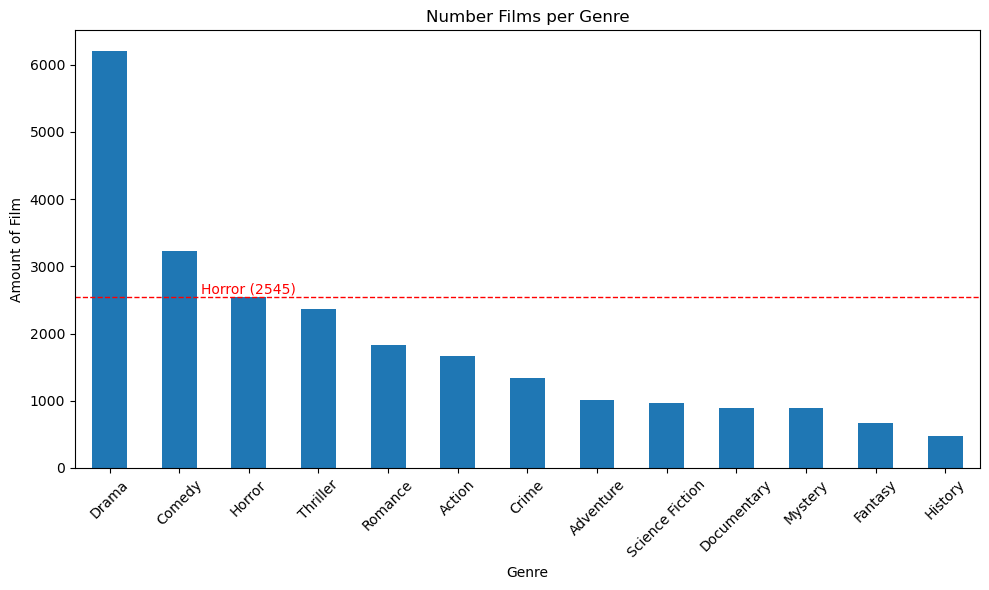

In [14]:
# Hitung jumlah masing-masing genre
genre_counts = df['genre'].value_counts()

# Visualisasi
plt.figure(figsize=(10, 6))
ax = genre_counts.plot(kind='bar')

# Tambahkan garis horizontal putus-putus merah di atas bar 'Drama' dan 'Comedy'
highlight_genres = ['Horror']
for genre in highlight_genres:
    if genre in genre_counts:
        height = genre_counts[genre]
        plt.axhline(y=height, color='red', linestyle='--', linewidth=1)
        plt.text(
            x=genre_counts.index.get_loc(genre),
            y=height + 0.5,
            s=f'{genre} ({height})',
            color='red',
            ha='center',
            va='bottom'
        )

plt.title('Number Films per Genre')
plt.xlabel('Genre')
plt.ylabel('Amount of Film')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**MENGAMBIL 4 GENRE TERATAS DAN MENYEIMBANGKAN DATA**

In [54]:
# --- 1. Menyisakan 4 Genre Teratas ---

# Hitung jumlah masing-masing genre dari dataframe saat ini
genre_counts = dataset['genre'].value_counts()  # menghasilkan Series: index = genre, value = jumlahnya
# Ambil 3 genre dengan jumlah kemunculan terbesar
top3_genres = genre_counts.head(3).index.tolist()
print("Top 3 genre:", top3_genres)

# Filter data sehingga hanya baris dengan genre termasuk top 3
df_top3 = dataset[dataset['genre'].isin(top3_genres)].copy()

# --- 2. Seimbangkan jumlah data untuk tiap genre ---
# Tujuannya: setiap genre (di antara top 5) hanya memiliki jumlah baris yang sama,
# yakni jumlah minimum dari masing-masing genre pada data df_top5

# Hitung jumlah tiap genre di df_top3
top3_counts = df_top3['genre'].value_counts()
min_count = top3_counts.min()
print("\nJumlah masing-masing genre sebelum penyeimbangan:\n", top3_counts)
print("Jumlah minimum untuk penyeimbangan:", min_count)

# Sampling tiap group agar tiap genre memiliki jumlah data sama dengan min_count
df_balanced = df_top3.groupby('genre', group_keys=False).apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)

# Tampilkan jumlah data per genre setelah penyeimbangan
balanced_counts = df_balanced['genre'].value_counts().sort_index()
print("\nJumlah masing-masing genre setelah penyeimbangan:\n", balanced_counts)

Top 3 genre: ['Drama', 'Comedy', 'Horror']

Jumlah masing-masing genre sebelum penyeimbangan:
 Drama     6203
Comedy    3227
Horror    2545
Name: genre, dtype: int64
Jumlah minimum untuk penyeimbangan: 2545

Jumlah masing-masing genre setelah penyeimbangan:
 Comedy    2545
Drama     2545
Horror    2545
Name: genre, dtype: int64


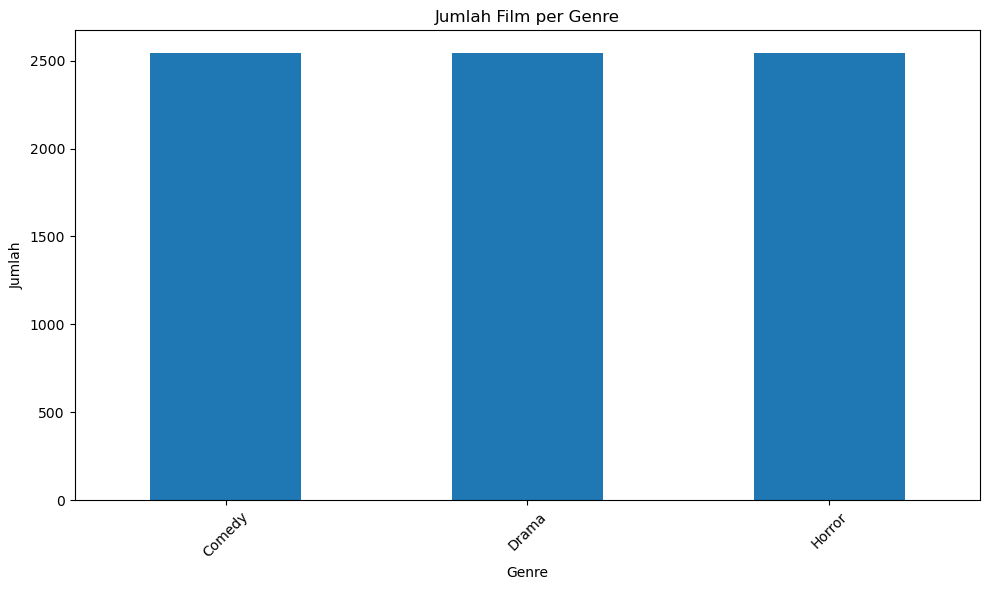

In [56]:
df = pd.DataFrame(df_balanced)

# Hitung jumlah masing-masing genre
genre_counts = df['genre'].value_counts()

# Visualisasi
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Jumlah Film per Genre')
plt.xlabel('Genre')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
df_balanced.to_csv('dataset_final_tes.csv', index=False)